### Exploring Data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np 


In [2]:
# Load the dataset
file_path = '/Users/bhaskaradhikari/feynn case study/mcdonalds.csv'
mcdonalds_data = pd.read_csv(file_path)

In [3]:
# Display basic information 
data_info = mcdonalds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
#the first few rows of the dataset
first_few_rows = mcdonalds_data.head()
first_few_rows

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# Checking for Missing Values
mcdonalds_data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
# Summary Statistics for numerical variables (here it's only 'Age')
mcdonalds_data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


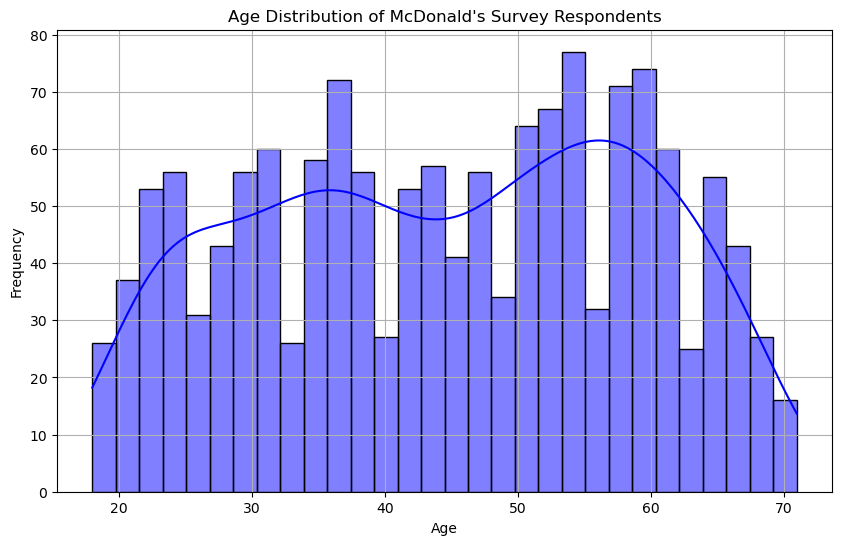

In [7]:
# Visualization 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(mcdonalds_data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of McDonald\'s Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

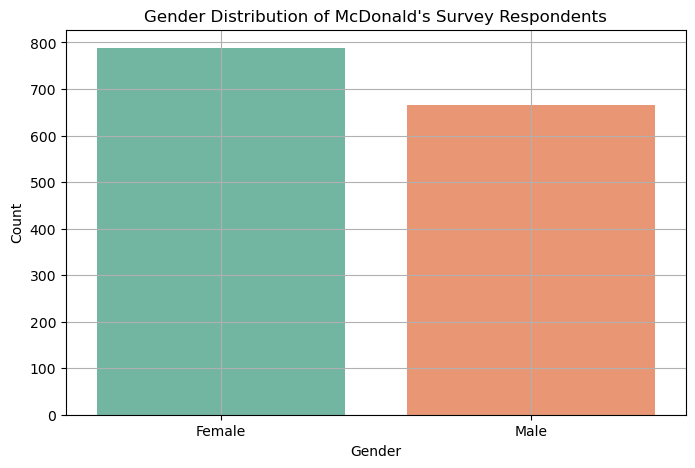

In [8]:
# Visualization 2: Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=mcdonalds_data, palette='Set2')
plt.title('Gender Distribution of McDonald\'s Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [9]:
mcdonalds_data['Gender'].value_counts()
#Gender Distribution: There are 788 females and 665 males in the dataset.

Gender
Female    788
Male      665
Name: count, dtype: int64

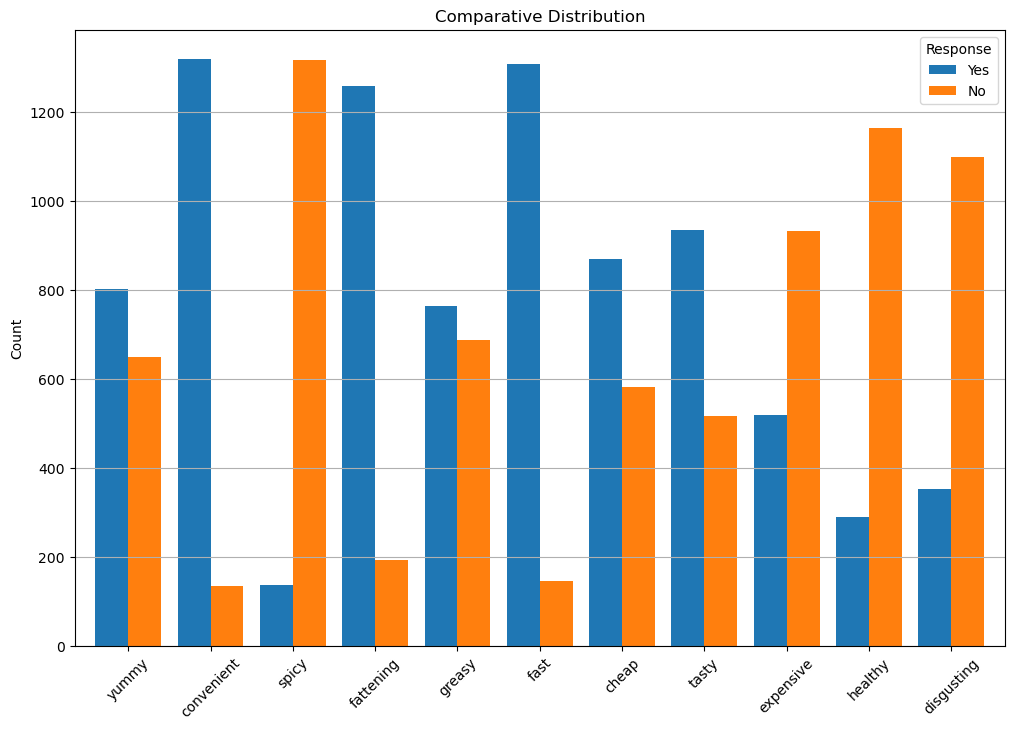

In [10]:
catogarical_attributes = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']

# Plotting the combined bar chart
catogarical_data = pd.DataFrame()
for attribute in catogarical_attributes:
    temp = mcdonalds_data[attribute].value_counts().rename_axis('Response').reset_index(name=attribute)
    catogarical_data = pd.concat([catogarical_data, temp.set_index('Response')], axis=1)

catogarical_data.T.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Comparative Distribution')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Response')
plt.show()

In [11]:
# Calculating the count for each catogarical attribute
catogorical_counts = pd.DataFrame()
for attribute in catogarical_attributes:
    count = mcdonalds_data[attribute].value_counts()
    catogorical_counts[attribute] = count
catogorical_counts.rename_axis('Response')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
Response,,,,,,,,,,,
Yes,803,1319,136,1260,765,1308,870,936,520,289,353
No,650,134,1317,193,688,145,583,517,933,1164,1100


In [12]:
# Visit Frequency count. 
visit_frequency_counts = mcdonalds_data['VisitFrequency'].value_counts()
visit_frequency_counts

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [13]:
# dimension 
mcdonalds_data.shape

(1453, 15)

In [14]:
# column name put to a list 
column_names = mcdonalds_data.columns.tolist()
column_names

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [15]:
# Select the first 11 columns and convert "Yes" to 1, others to 0
# instead of this we can use mapping or getdummies to set yes no to 0,1
MD_x = mcdonalds_data.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
# Calculate the mean of each column and round to two decimal places.. 
rounded_col_means = MD_x.mean().round(2)    
rounded_col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [16]:
# performing pca for dimension reduction
pca = PCA()
MD_pca = pca.fit(MD_x)

std_dev = np.sqrt(pca.explained_variance_)  #find std_dev
proportion_variance = pca.explained_variance_ratio_  # find proportion_variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # find cumulative_variance

pca_summary_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_variance
})
new_column_names = ['PCA' + str(i) for i in range(1, 12)]
transposed_df = pca_summary_df.T
transposed_df.columns = new_column_names
transposed_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
Standard Deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [17]:
# Standard Deviations round off -> 1 decimal
std_dev = np.round(np.sqrt(pca.explained_variance_), 1)
print("Standard Deviation:\n",std_dev)


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [18]:
#Rotation Matrix
rotation_matrix = np.round(pca.components_, 3)*-1

df=pd.DataFrame(rotation_matrix.T) 
df.columns=new_column_names
new_row_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
    'fast', 'cheap', 'tasty', 'expensive', 'healthy', 
    'disgusting'
]
df.index=new_row_names
df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [19]:
# first find PCA scores
pca_scores = pca.transform(MD_x)

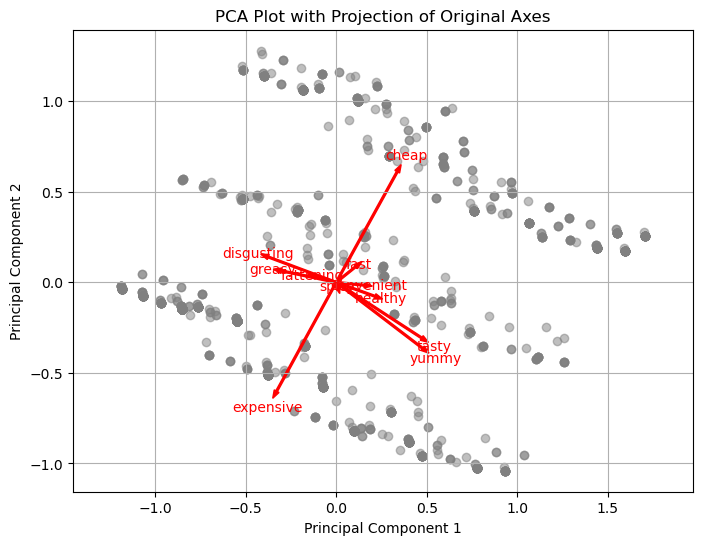

In [20]:
# Plotting the PCA scores
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)

# Adding the projection of the original axes (loadings)
for i, component in enumerate(rotation_matrix.T):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.15, component[1] * 1.15, column_names[i], color='red', ha='center', va='center')

# Setting up the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projection of Original Axes')
plt.grid(True)
plt.axis('equal')  # Ensuring the scale is the same on both axes
plt.show()



### Step 5: Extracting Segments
### Using k-Means

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Simulated data with 11 features
np.random.seed(1234)
data = MD_x  


### K-Means Clustering Function

In [22]:
# Function to perform k-means with multiple random restarts
def kmeans_clustering(data, n_clusters, n_init):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
    kmeans.fit(data)
    return kmeans.labels_, kmeans


### Means for Stability Assessment

In [23]:
# Function to perform k-means clustering for stability assessment
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit_predict(data)


### Clustering Analysis and Stability Assessment

In [24]:
# Store results for comparison, KMeans models, and stability scores
results = {}
kmeans_models = []
inertias = []
stability_scores = {k: [] for k in range(2, 9)}
num_replications = 10  # Number of replications for stability assessment

for n_clusters in range(2, 9):
    labels, kmeans_model = kmeans_clustering(data, n_clusters, 10)
    kmeans_models.append(kmeans_model)
    inertias.append(kmeans_model.inertia_)

    # Stability assessment
    labels_list = [perform_kmeans(data, n_clusters) for _ in range(num_replications)]
    for i in range(num_replications):
        for j in range(i + 1, num_replications):
            score = adjusted_rand_score(labels_list[i], labels_list[j])
            stability_scores[n_clusters].append(score)

    # Analyzing the clusters
    unique, counts = np.unique(labels, return_counts=True)
    cluster_distribution = dict(zip(unique, counts))


    results[n_clusters] = {
        "Cluster Distribution": cluster_distribution,
    }

/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

### Displaying Results and Scree Plot

Results for 2 Segments:
  Cluster Distribution: {0: 896, 1: 557}
Results for 3 Segments:
  Cluster Distribution: {0: 618, 1: 338, 2: 497}
Results for 4 Segments:
  Cluster Distribution: {0: 364, 1: 240, 2: 533, 3: 316}
Results for 5 Segments:
  Cluster Distribution: {0: 227, 1: 309, 2: 254, 3: 391, 4: 272}
Results for 6 Segments:
  Cluster Distribution: {0: 254, 1: 205, 2: 237, 3: 239, 4: 245, 5: 273}
Results for 7 Segments:
  Cluster Distribution: {0: 290, 1: 178, 2: 201, 3: 241, 4: 142, 5: 270, 6: 131}
Results for 8 Segments:
  Cluster Distribution: {0: 168, 1: 179, 2: 114, 3: 175, 4: 256, 5: 125, 6: 151, 7: 285}


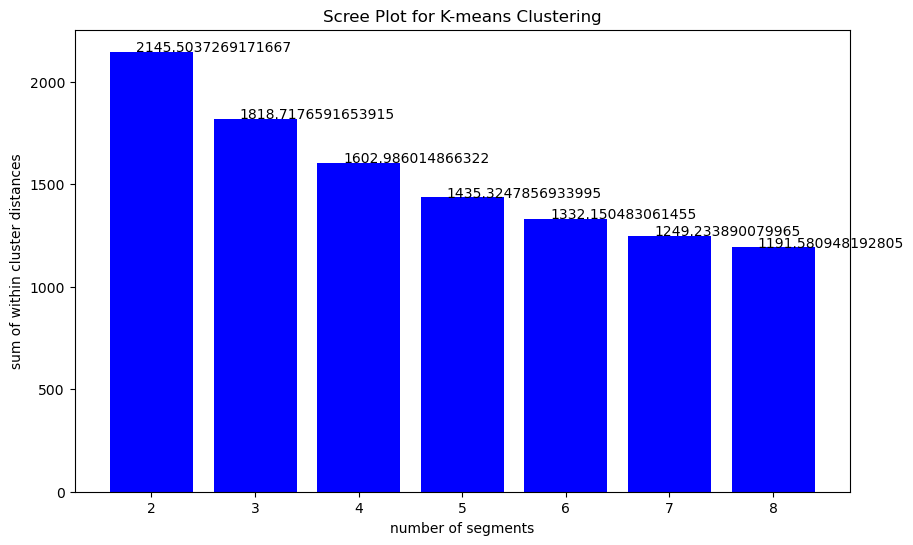

In [25]:
# Displaying the results
for n_clusters, result in results.items():
    print(f"Results for {n_clusters} Segments:")
    print(f"  Cluster Distribution: {result['Cluster Distribution']}")

# Creating a scree plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(2, 9), inertias, color='blue')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Scree Plot for K-means Clustering')
plt.xticks(range(2, 9))

for bar, inertia in zip(bars, inertias):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(inertia), fontsize=10, color='black')

plt.show()


### Calculating and Displaying Stability Scores

In [26]:
# Calculating average stability score for each number of clusters
average_stability = {k: np.mean(v) for k, v in stability_scores.items()}

# Identifying the number of clusters with the highest stability score
optimal_clusters = max(average_stability, key=average_stability.get)

# Output results for stability scores
print("Average Stability Scores for Different Number of Clusters:")
for k, v in average_stability.items():
    print(f"  Clusters: {k}, Average Stability Score: {v:.3f}")

print(f"\nOptimal number of clusters based on stability: {optimal_clusters}")

Average Stability Scores for Different Number of Clusters:
  Clusters: 2, Average Stability Score: 1.000
  Clusters: 3, Average Stability Score: 0.966
  Clusters: 4, Average Stability Score: 0.843
  Clusters: 5, Average Stability Score: 0.748
  Clusters: 6, Average Stability Score: 0.765
  Clusters: 7, Average Stability Score: 0.732
  Clusters: 8, Average Stability Score: 0.675

Optimal number of clusters based on stability: 2


### Box Plot of Stability Scores

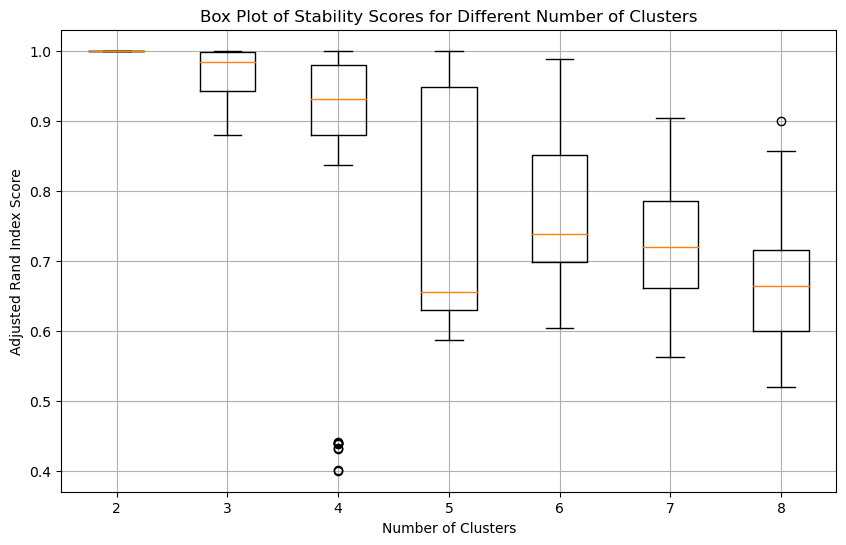

In [27]:
# Plotting the box plot of stability scores
plt.figure(figsize=(10, 6))
plt.boxplot([stability_scores[k] for k in range(2, 9)], labels=[str(k) for k in range(2, 9)])
plt.title('Box Plot of Stability Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index Score')
plt.grid(True)
plt.show()


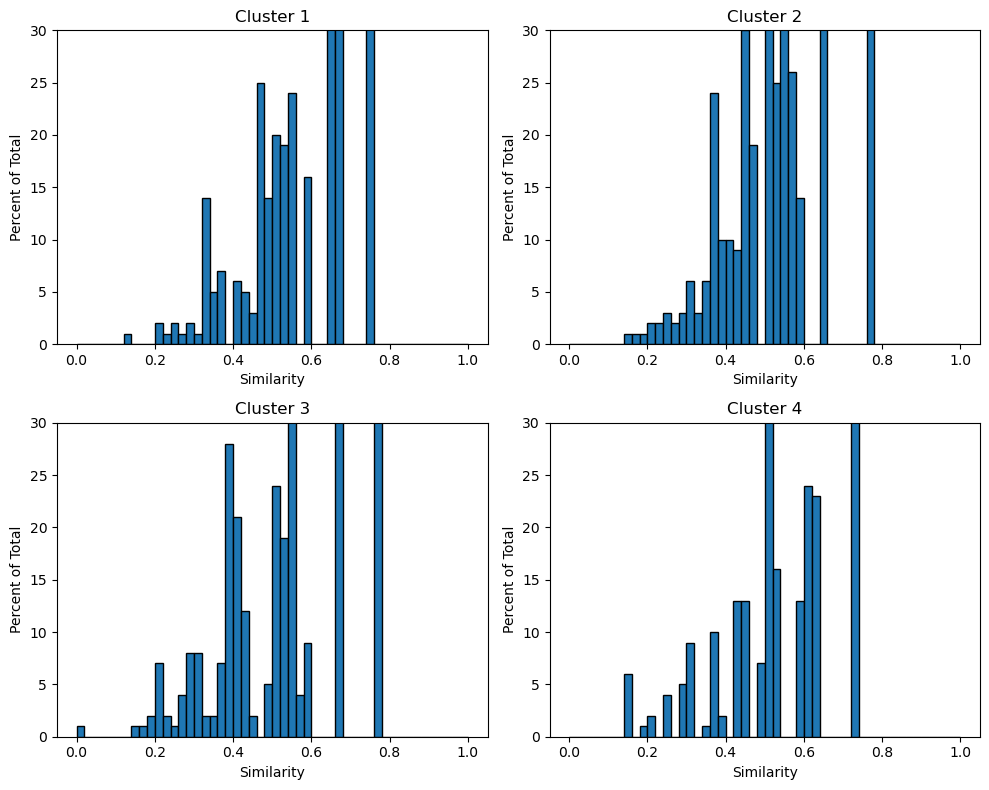

In [28]:
np.random.seed(1234)
data = MD_x  

# Perform k-means clustering for 4 segments
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(data)

# Assign each data point to the nearest cluster and calculate the distance from the centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# We will calculate the euclidean distance from each point to its cluster centroid
distances = np.sqrt(((data - centroids[labels]) ** 2).sum(axis=1))

# Normalize distances to a similarity score between 0 and 1 for the sake of the example
similarities = 1 - (distances / np.max(distances))

# Create subplots for each cluster
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i in range(4):
    cluster_similarities = similarities[labels == i]
    axes[i].hist(cluster_similarities, bins=50, range=(0,1), edgecolor='black')
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].set_xlabel('Similarity')
    axes[i].set_ylabel('Percent of Total')
    axes[i].set_ylim(0, 30)  # Assuming percent of total is based on the y-axis limit
    
# Adjust the layout
plt.tight_layout()
plt.show()


/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

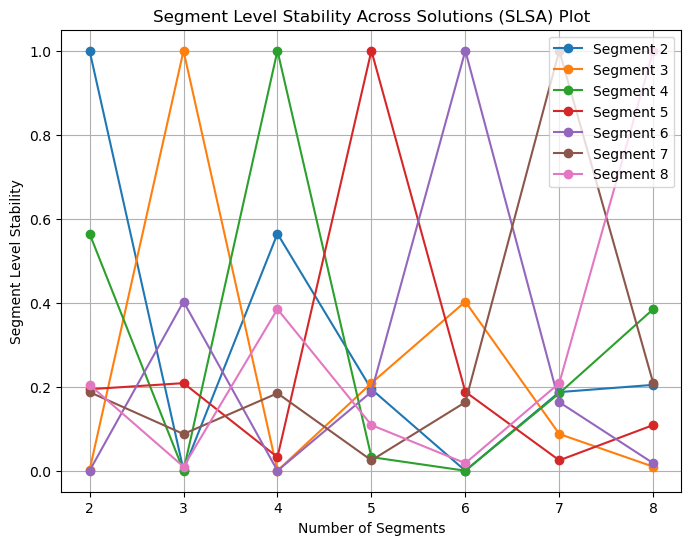

In [29]:
# Perform clustering 
segment_stability_final = []

for segment in range(2, 9):
    kmeans = KMeans(n_clusters=segment, random_state=42)
    labels = kmeans.fit_predict(MD_x)
    segment_stability_final.append(labels)

# Plotting SLSA with cleaned and verified data
plt.figure(figsize=(8, 6))

for i, segment in enumerate(range(2, 9)):
    plt.plot(range(2, 9), [np.mean(segment_stability_final[i] == labels) for labels in segment_stability_final], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(list(range(2, 9)))
plt.legend()
plt.grid(True)

plt.show()


/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

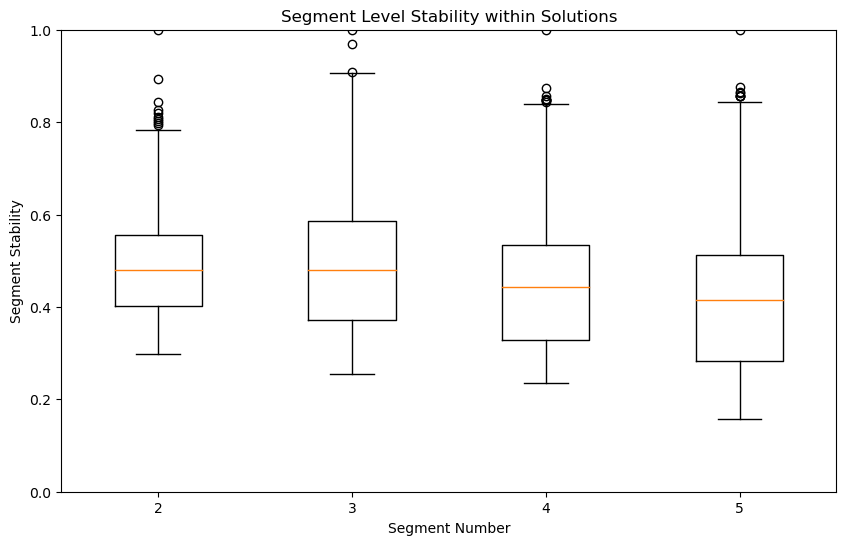

In [30]:
segment_solutions = ["2", "3", "4", "5"]

# Generate a KMeans model for each segment solution
MD_km28 = {}
for segment in segment_solutions:
    MD_km28[segment] = KMeans(n_clusters=int(segment), random_state=0).fit(MD_x)

# Predict labels and calculate similarities (distances) for each segment solution
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

# Normalizing the similarities and preparing the stability values for the plot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

# Plotting the boxplot for each segment solution's stability
plt.figure(figsize=(10, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()





## Mixtures of Distributions

In [31]:
from sklearn.mixture import GaussianMixture

# Function to calculate entropy of classification
def classification_entropy(model, data):
    probs = model.predict_proba(data)
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Adding a small value to avoid log(0)
    return entropy

# Your binary data
data = MD_x  

# List to store results
results = []

# Fit models and collect results
for k in range(2, 9):  # Equivalent to 2:8 in R
    model = GaussianMixture(n_components=k, random_state=1234).fit(data)
    
    entropy = classification_entropy(model, data)
    bic = model.bic(data)
    icl = bic - entropy
    
    # Collecting results
    results.append({
        "iter": model.n_iter_,
        "converged": model.converged_,
        "k": k,
        "logLik": model.score(data) * len(data),  # Total log-likelihood
        "AIC": model.aic(data),
        "BIC": bic,
        "ICL": icl
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


   iter  converged  k        logLik           AIC           BIC           ICL
0     5       True  2   4943.616042  -9577.232084  -8758.617306  -8758.617307
1     7       True  3  11965.368201 -23464.736403 -22234.173543 -22234.173569
2    10       True  4  13740.703880 -26859.407760 -25216.896819 -25216.897651
3    11       True  5  17863.943870 -34949.887740 -32895.428716 -32897.708617
4     7       True  6  18472.532572 -36011.065145 -33544.658040 -33546.878483
5    13       True  7  17056.143476 -33022.286952 -30143.931765 -30166.998294
6     9       True  8  21660.999320 -42075.998640 -38785.695372 -38786.087489


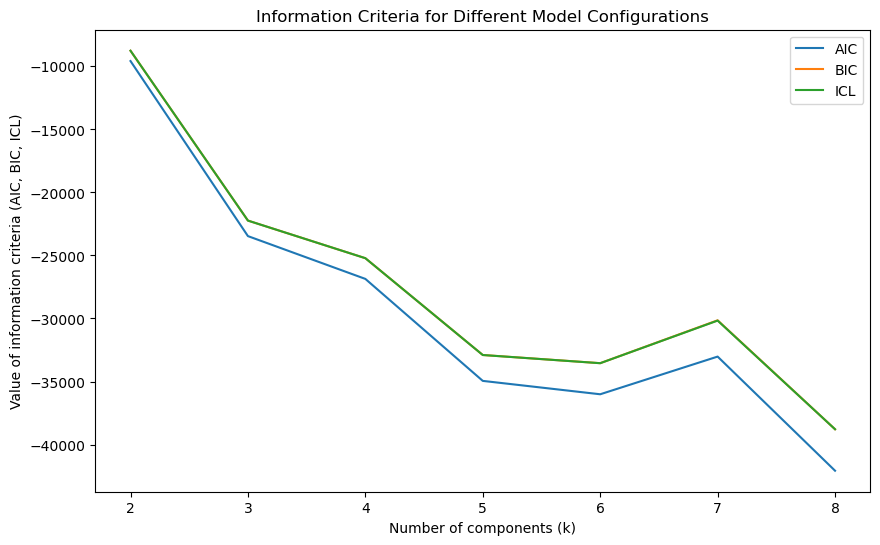

In [32]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(results_df["k"], results_df["AIC"], label='AIC')
plt.plot(results_df["k"], results_df["BIC"], label='BIC')
plt.plot(results_df["k"], results_df["ICL"], label='ICL')
plt.xlabel('Number of components (k)')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Information Criteria for Different Model Configurations')
plt.legend()
plt.show()


### Using Mixtures of Regression Models

In [33]:
# Importing necessary libraries

from patsy import dmatrices
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm



In [34]:
mcdonald= mcdonalds_data

In [35]:
# converting catogorical_to_numeric
catogorical_to_numeric = {'I hate it!-5': '-5', 'I love it!+5': '+5'}
mcdonald['Like'].replace(catogorical_to_numeric, inplace=True) #replace catogorical_to_numeric
frequency_table = mcdonald['Like'].value_counts()  # Creates a frequency table

sorted_frequency_table = frequency_table.sort_index(ascending=True)
print(sorted_frequency_table)

Like
+1    152
+2    187
+3    229
+4    160
+5    143
-1     58
-2     59
-3     73
-4     71
-5    152
0     169
Name: count, dtype: int64


In [36]:
#converting like column to int 
mcdonald['Like'] = mcdonald['Like'].apply(lambda x: int(x.replace('+', '')))

In [37]:
#creating formula 
columns = '+'.join(mcdonald.columns[0:11]) 
formula = f'Like ~ {columns}'
formula

'Like ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting'

In [38]:
# Use patsy to extract X and y from the DataFrame based on the formula
y, X = dmatrices(formula, data=mcdonald, return_type='dataframe')

In [39]:
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234, verbose=0)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [40]:
# Extracting and displaying information
labels = gmm.predict(X)
cluster_sizes = pd.Series(labels).value_counts().sort_index()
converged = gmm.converged_
n_iterations = gmm.n_iter_

print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Component {i + 1}: {size} data points")
print(f"Convergence after {n_iterations} iterations: {converged}")

Cluster Sizes:
Component 1: 985 data points
Component 2: 468 data points
Convergence after 7 iterations: True


In [41]:
# Preparing data for each component
data_comp1 = mcdonald[labels == 0]
data_comp2 = mcdonald[labels == 1]

# Extract y and X for each component using the formula
y_comp1, X_comp1 = dmatrices(formula, data=data_comp1, return_type='dataframe')
y_comp2, X_comp2 = dmatrices(formula, data=data_comp2, return_type='dataframe')

# Now you can fit separate regression models for each component
model_comp1 = sm.OLS(y_comp1, sm.add_constant(X_comp1)).fit()
model_comp2 = sm.OLS(y_comp2, sm.add_constant(X_comp2)).fit()

In [42]:
print(model_comp1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     83.00
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.34e-104
Time:                        12:45:57   Log-Likelihood:                -1982.1
No. Observations:                 985   AIC:                             3982.
Df Residuals:                     976   BIC:                             4026.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0959      0.249  

In [43]:
print(model_comp2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     59.23
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.03e-80
Time:                        12:45:57   Log-Likelihood:                -1001.6
No. Observations:                 468   AIC:                             2027.
Df Residuals:                     456   BIC:                             2077.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4721      0.40

In [44]:
def create_summary(model):
    summary_df = pd.DataFrame({'Coef.': model.params, 'P>|t|': model.pvalues})
    conf_int = model.conf_int()
    summary_df['lower_ci'] = conf_int[0]
    summary_df['upper_ci'] = conf_int[1]
    return summary_df

# Create summaries
summary_comp1 = create_summary(model_comp1)
summary_comp2 = create_summary(model_comp2)

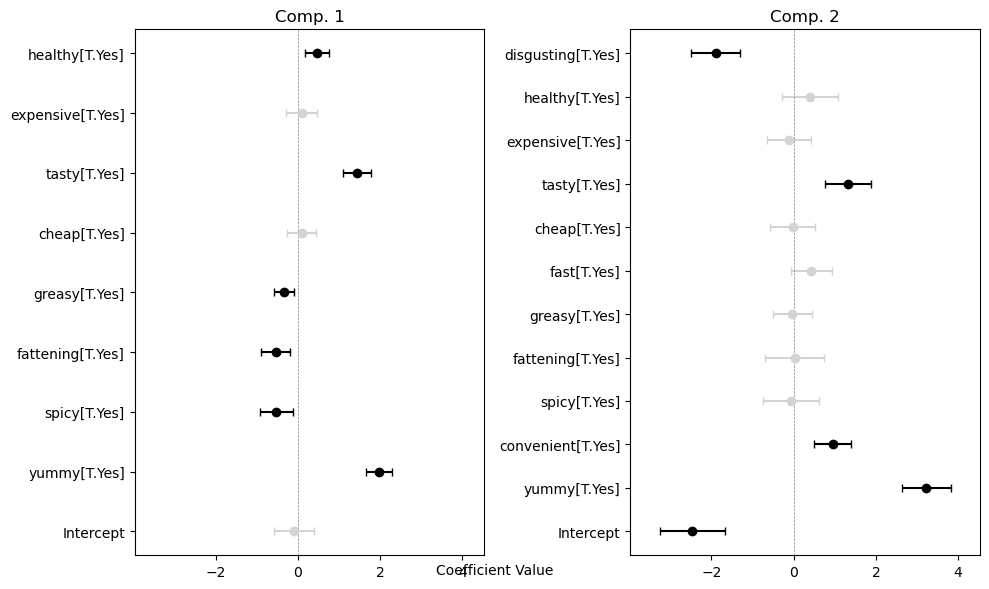

In [45]:
# Define the plotting function
def plot_coefficients(summary, ax, title, alpha=0.05, color_significant='black', color_insignificant='lightgrey'):
    y_labels = summary.index
    y_ticks = np.arange(len(y_labels))
    for i, (index, row) in enumerate(summary.iterrows()):
        coef, lower_ci, upper_ci, p_value = row['Coef.'], row['lower_ci'], row['upper_ci'], row['P>|t|']
        color = color_significant if p_value < alpha else color_insignificant
        # Calculate the errors from the coefficient to the confidence interval bounds
        err = [[coef - lower_ci], [upper_ci - coef]]
        ax.errorbar(coef, y_ticks[i], xerr=err, fmt='o', color=color, ecolor=color, capsize=3)
    
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.axvline(x=0, color='grey', linestyle='--', lw=0.5)
    ax.set_title(title)

# Plotting setup
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Adjust the x-axis scale based on the confidence intervals
all_intervals = np.concatenate([summary_comp1['lower_ci'], summary_comp1['upper_ci'], 
                                summary_comp2['lower_ci'], summary_comp2['upper_ci']])
x_min, x_max = all_intervals.min(), all_intervals.max()
x_margin = (x_max - x_min) * 0.1  # 10% margin
x_min, x_max = x_min - x_margin, x_max + x_margin

# Plot the coefficients for each component
plot_coefficients(summary_comp1, axs[0], 'Comp. 1')
plot_coefficients(summary_comp2, axs[1], 'Comp. 2')

# Set the same x-axis limits for both subplots
axs[0].set_xlim(x_min, x_max)
axs[1].set_xlim(x_min, x_max)

# Add a shared x-axis label
fig.text(0.5, 0.04, 'Coefficient Value', ha='center', va='center')

# Layout adjustment
plt.tight_layout()

# Display the plot
plt.show()


# Profiling Segments

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

In [47]:
data = mcdonalds_data

In [48]:
# Selecting only the attributes for clustering
attributes = data.iloc[:, :11]

# Encoding the categorical data (Yes/No) to numeric (1/0)
label_encoder = LabelEncoder()
encoded_attributes = attributes.apply(label_encoder.fit_transform)

# Transposing the data to perform clustering on attributes
transposed_attributes = encoded_attributes.T

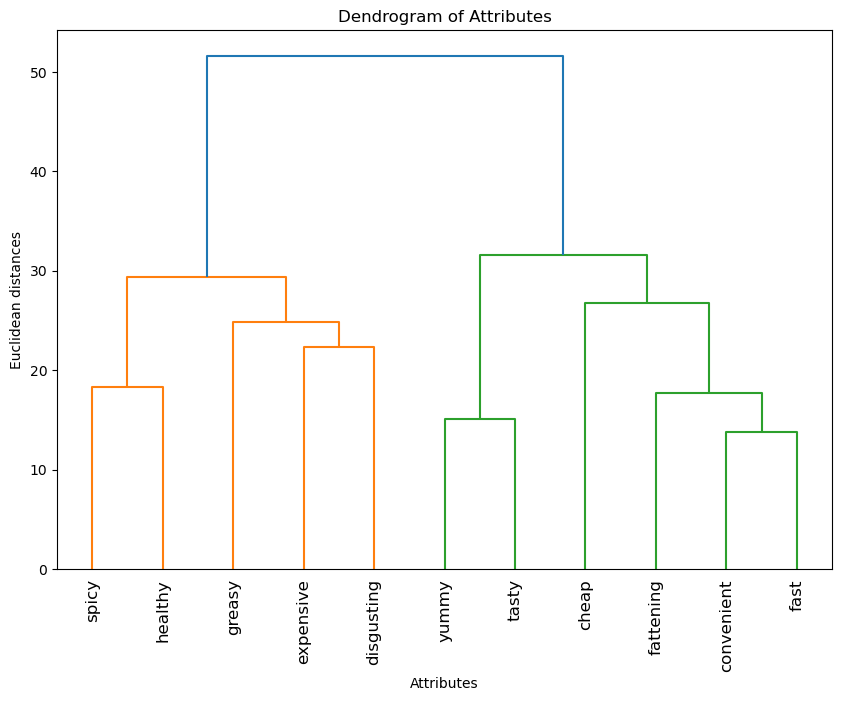

In [49]:
# Performing hierarchical clustering
linked_attributes = linkage(transposed_attributes, method='ward')

# Creating a dendrogram to visualize the clustering
plt.figure(figsize=(10, 7))
dendrogram(linked_attributes, labels=transposed_attributes.index, leaf_rotation=90)
plt.title("Dendrogram of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Euclidean distances")
plt.show()

# Extracting the order of attributes from the clustering
order = [transposed_attributes.index[i] for i in dendrogram(linked_attributes, no_plot=True)['leaves']]
order.reverse()  # Reverse the order as per the requirement



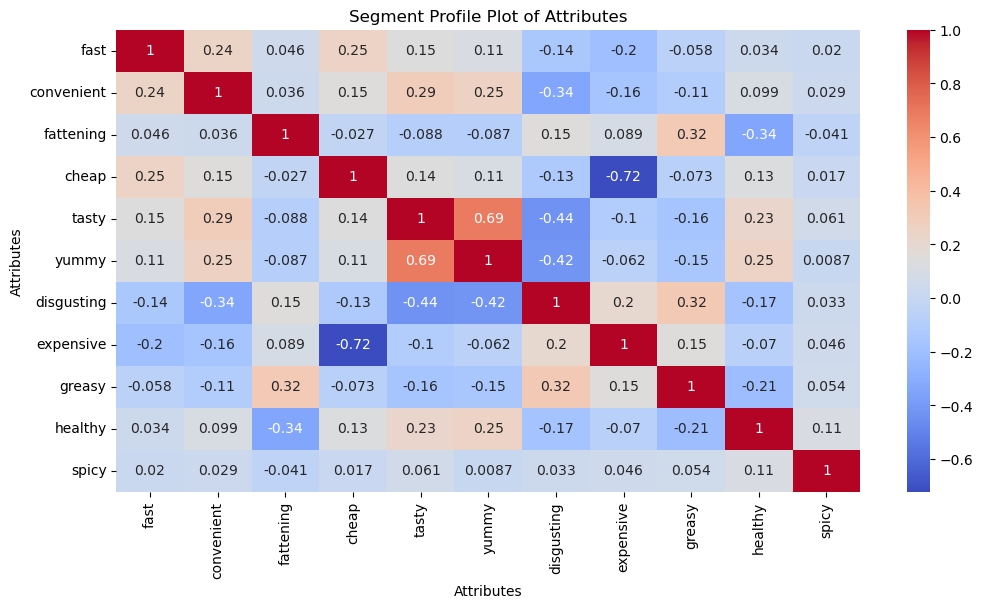

In [50]:
# Rearranging the encoded attributes based on the hierarchical clustering order
rearranged_attributes = encoded_attributes[order]

# Creating a segment profile plot
plt.figure(figsize=(12, 6))
sns.heatmap(rearranged_attributes.corr(), annot=True, cmap='coolwarm')
plt.title("Segment Profile Plot of Attributes")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()


In [51]:
# Performing K-means clustering to segment the data into four groups
kmeans = KMeans(n_clusters=4, random_state=1234)
segments = kmeans.fit_predict(encoded_attributes)

# Getting the size of each cluster
cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()


/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
df = pd.DataFrame(data, columns=attributes, index=clusters)
df.index = [f'{cluster}: {size} ({size/sum(cluster_sizes):.0%})' for cluster, size in zip(clusters, cluster_sizes)]
df.index 

Index(['Cluster 1: 364 (25%)', 'Cluster 2: 240 (17%)', 'Cluster 3: 533 (37%)',
       'Cluster 4: 316 (22%)'],
      dtype='object')

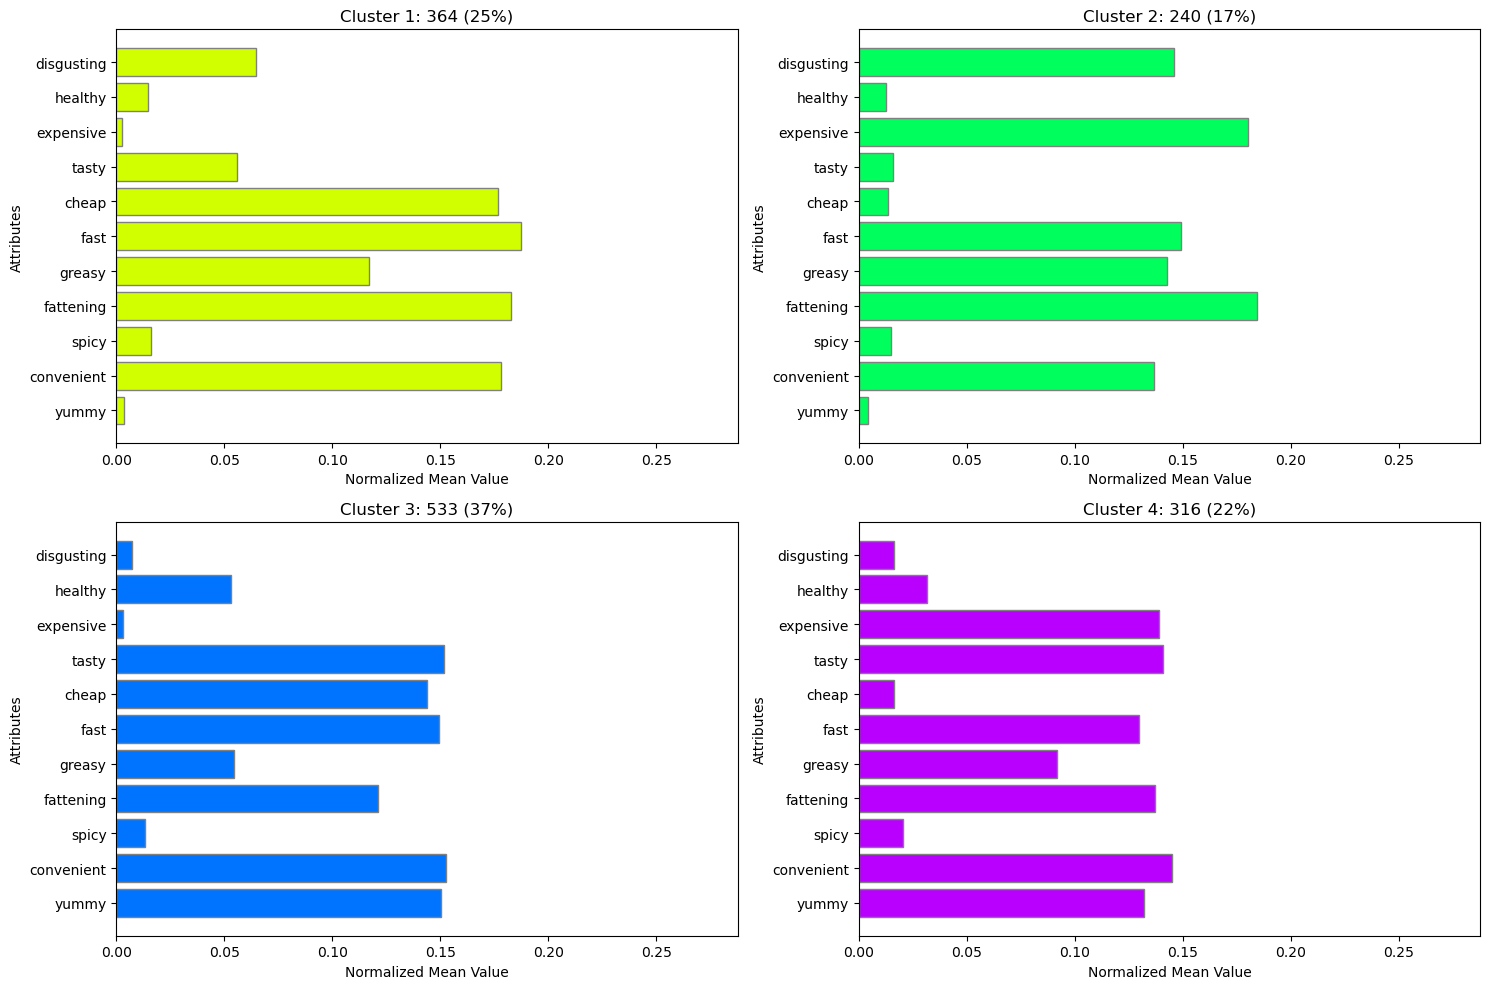

In [53]:
# Adding the segment labels to the encoded data
encoded_data_with_segments = encoded_attributes.copy()
encoded_data_with_segments['Segment'] = segments

# Calculating the mean of each attribute for each segment
segment_means = encoded_data_with_segments.groupby('Segment').mean().iloc[:, :11]  # Selecting only the first 11 columns which are attributes

# Creating a figure for the subplots
plt.figure(figsize=(15, 10))

# Normalizing the segment means for better visualization
normalized_segment_means = (segment_means.T / segment_means.T.sum()).T

# Plotting the bar plots for each segment in separate subplots
for i, segment in enumerate(normalized_segment_means.index):
    # Creating a subplot in a 2x2 layout
    plt.subplot(2, 2, i+1)
    
    # Plotting horizontal bar plot for the current segment
    plt.barh(normalized_segment_means.columns, normalized_segment_means.loc[segment],
             color=sns.color_palette("hsv", 4)[i],  # Using a color palette for differentiation
             edgecolor='grey',
             label=f'{df.index}'
             )
    
    # Setting the title for each subplot to indicate the segment
    #plt.title( df.index[i] : f'{segment}')
    plt.title(f'{df.index[i]}')

    
    # Optionally, adjust the x-axis limits for uniformity across subplots
    plt.xlim(0, normalized_segment_means.values.max() + 0.1)

    # Adding labels to the subplot
    plt.xlabel('Normalized Mean Value')
    plt.ylabel('Attributes')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


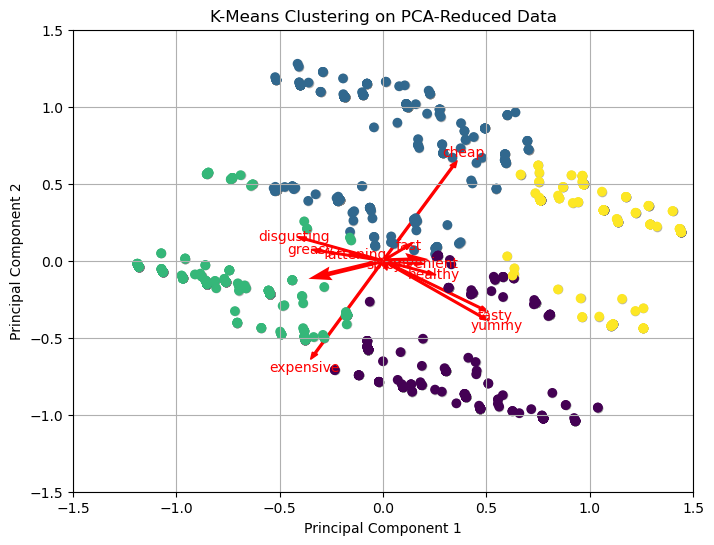

In [69]:
# PCA transformation
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(MD_pca) # Assuming 4 clusters for example

# Plotting the PCA scores
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)

# Adding the projection of the original axes (loadings)
for i, component in enumerate(rotation_matrix.T):
    plt.arrow(0, 0, component[0], component[1], color='red', width=0.01, head_width=0.03)
    plt.text(component[0] * 1.15, component[1] * 1.15, column_names[i], color='red', ha='center', va='center')

# Plotting the PCA-transformed data and coloring by cluster
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans.labels_, cmap='viridis')

# Adding labels
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")

# Plotting principal component axes
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()


### Describing Segments

In [54]:
from statsmodels.graphics.mosaicplot import mosaic

In [55]:
data = mcdonalds_data

/Users/bhaskaradhikari/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1200x800 with 0 Axes>

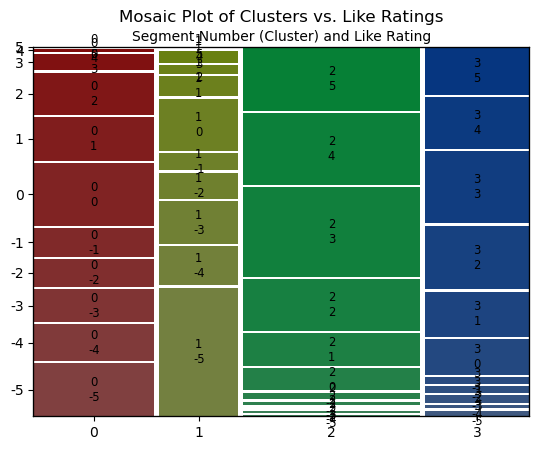

In [56]:
# Convert Yes/No responses to numerical values (1 for Yes, 0 for No)
binary_columns = data.columns[:-4]  # Exclude 'Like', 'Age', 'VisitFrequency', 'Gender'
for col in binary_columns:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Clustering: Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
data['cluster'] = kmeans.fit_predict(data[binary_columns])

# Prepare data for the mosaic plot: Create a contingency table
contingency_table = pd.crosstab(data['cluster'], data['Like'])

# Mosaic plot
plt.figure(figsize=(12, 8))
mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot of Clusters vs. Like Ratings')
plt.xlabel('Segment Number (Cluster) and Like Rating')
plt.ylabel('Frequency')
plt.show()

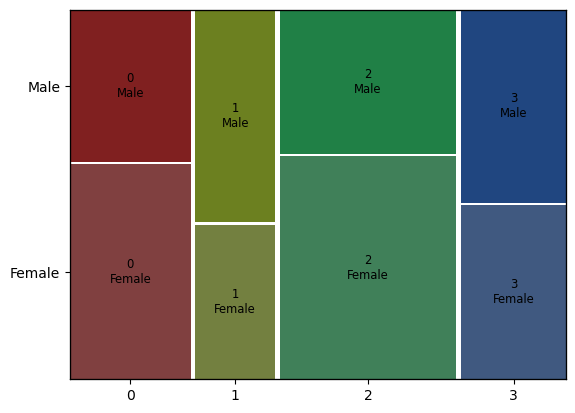

In [57]:
k4 = kmeans.labels_
ct = pd.crosstab(kmeans.labels_, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

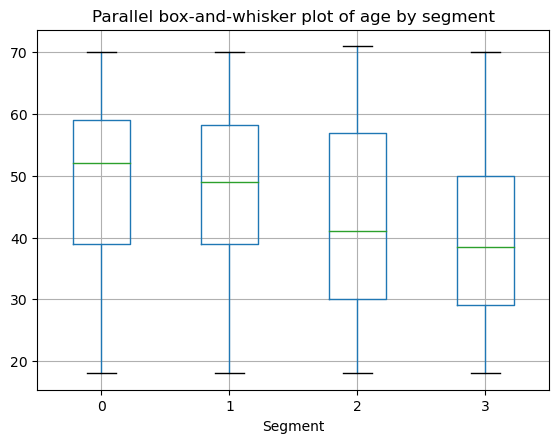

In [58]:
# creating box plot 
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

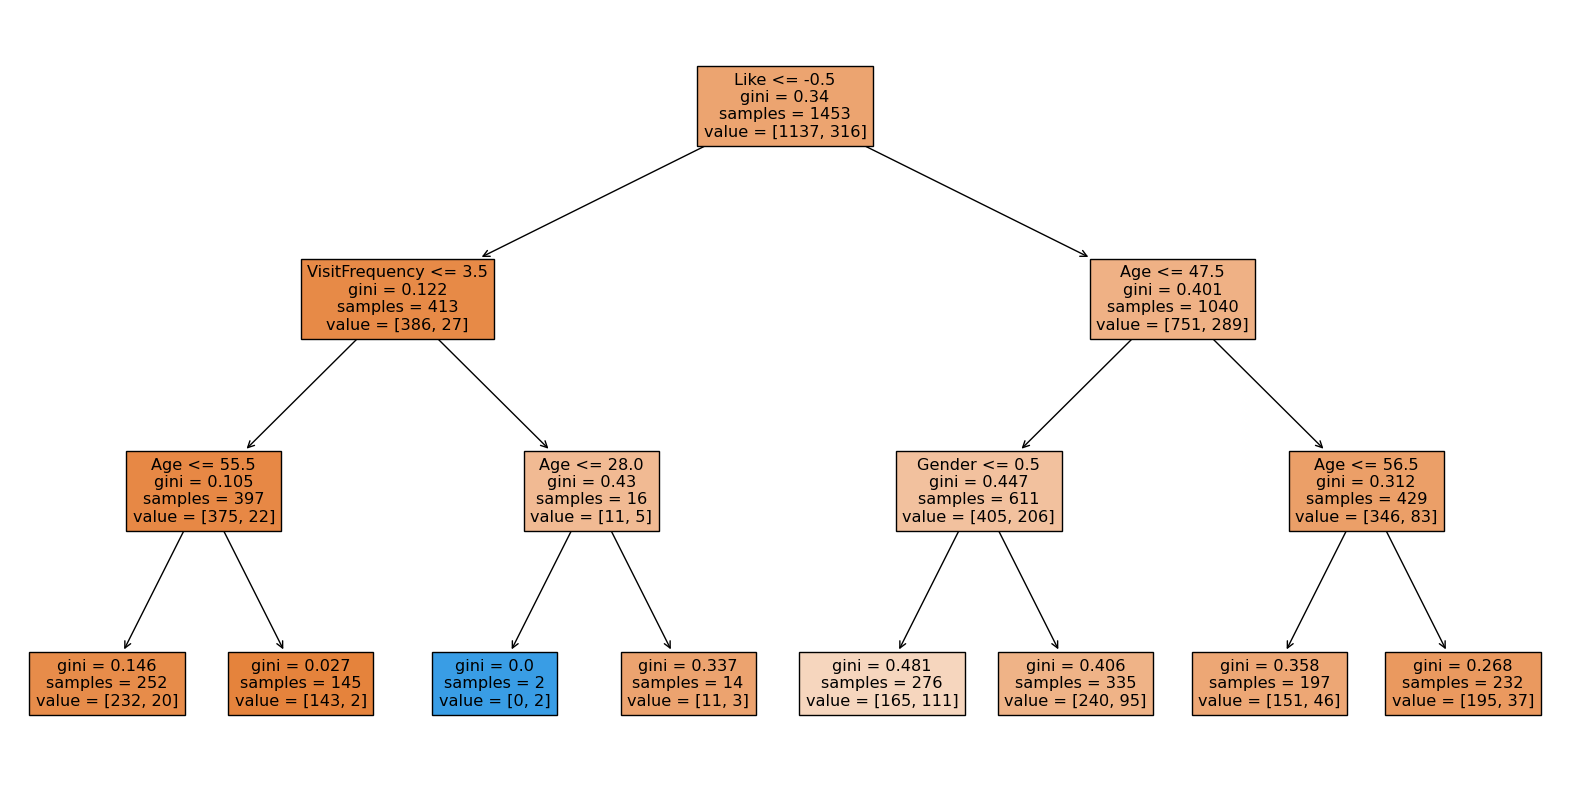

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Preparing the data
df=data
# Mapping the 'VisitFrequency' column to an ordinal scale
ordinal_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}

# Applying the mapping to the dataset
df['VisitFrequency'] = df['VisitFrequency'].map(ordinal_mapping)

#female =1 , male=0
df['Gender'] = (df['Gender'] == 'Female').astype(int)

X = df[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = (df['cluster'] == 3).astype(int) 

tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X, y)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns.tolist())
plt.show()


### Selecting (the) Target Segment(s)

In [60]:
df = pd.DataFrame({'Segment': k4, 'VisitFrequency': data['VisitFrequency'], 'Like': data['Like'], 'Gender': data['Gender']})

# Calculate the mean of each segment for each segment
visit_means = df.groupby('Segment')['VisitFrequency'].mean()

pd.DataFrame(visit_means)

,VisitFrequency
Segment,
0,1.708791
1,1.408333
2,3.000000
3,2.860759


In [61]:
# Calculate the mean of like for each segment
like_means = df.groupby('Segment')['Like'].mean()
pd.DataFrame(like_means)

,Like
Segment,
0,-1.175824
1,-2.670833
2,2.834897
3,2.174051


In [62]:
# Calculate the mean of gender for each segment
female_means = df.groupby('Segment')['Gender'].mean()
pd.DataFrame(female_means)

,Gender
Segment,
0,0.585165
1,0.420833
2,0.607880
3,0.474684


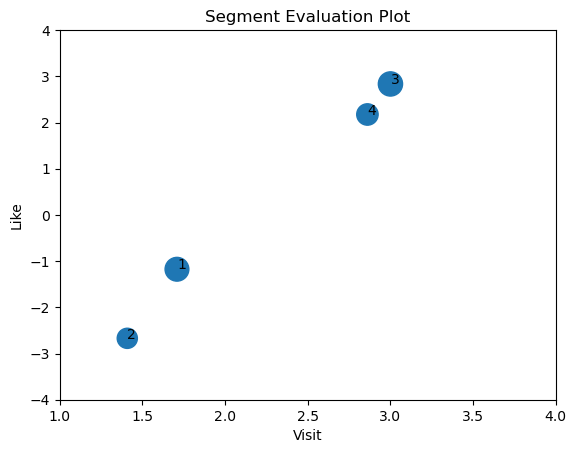

In [63]:
# Create the scatter plot
plt.scatter(visit_means, like_means , s=[500 * f for f in female_means])  # Multiply by 100 or another factor for better visibility

# Set the limits of the plot
plt.xlim(1, 4)
plt.ylim(-4, 4)

# Add text labels
for i, (x, y) in enumerate(zip(visit_means, like_means)):
    plt.text(x, y, str(i+1))

# Adding title and labels
plt.title("Segment Evaluation Plot")
plt.xlabel("Visit")
plt.ylabel("Like")
# Show the plot
plt.show()